In [1]:
import os
import pandas as pd 
import numpy as np 

# visualisation
import matplotlib.pylab as plt
import matplotlib.font_manager as fm

# our scripts 
import src.processing as sp 
import settings as st
import utils.helpers as hp

### Correct for the locations of the images 

In [ ]:
# dr5_desc = sp.read_parquet('gz_decals_volunteers_5', save = True, filename='decals_5_votes')

### Generate the descriptions for spiral and elliptical 

In [3]:
# dr5_desc = hp.read_parquet(st.data_dir, 'descriptions/decals_5_votes')

In [4]:
# dr5_spiral = sp.filtering(dr5_desc, st.condition_spiral, save=False, filename = 'decals_5_spiral')

In [5]:
# dr5_elliptical = sp.filtering(dr5_desc, st.condition_elliptical, save=False, filename = 'decals_5_elliptical')

### Subset of the Spirals and Ellipticals 

In [12]:
# df_spiral= sp.subset_df(dr5_spiral, 2000, random=True, save=True, filename='subset_spiral')

In [14]:
# df_elliptical = sp.subset_df(dr5_elliptical, 2000, random=True, save=True, filename='subset_elliptical')

### Move data
Given a pandas dataframe, copy images from Mike's folder to our folder.

In [12]:
# df_spiral = hp.read_parquet(st.data_dir, 'descriptions/subset_spiral')
# df_elliptical = hp.read_parquet(st.data_dir, 'descriptions/subset_elliptical')

In [13]:
# sp.copy_images(df_spiral, 'spiral')
# sp.copy_images(df_elliptical, 'elliptical')

### Split the data into Training/Validation

In [28]:
# d = sp.split_data(['spiral', 'elliptical'], save=False)

### Generate the Training/Validation sets (images)

In [2]:
# sp.images_train_validate(['spiral', 'elliptical'])

### Load Deep Learning Model

In [4]:
import os
import torch
from torchvision import transforms
from PIL import Image

In [5]:
from src.networks import SiameseNetwork

In [6]:
model_path = '../fs-models/siamese_resnet18.pth'

In [7]:
device = torch.device('cpu')
model = SiameseNetwork(backbone="resnet18")

In [8]:
model.load_state_dict(torch.load(model_path, map_location=device))

<All keys matched successfully>

In [10]:
trans = [transforms.Grayscale(num_output_channels=1), transforms.ToTensor(), transforms.Resize(300), transforms.CenterCrop(224)]

In [11]:
transformation = transforms.Compose(trans)

Testing two spirals from the following folder

In [16]:
img_path = '/data/phys-zooniverse/phys2286/data/images/spiral/'

In [19]:
paths = os.listdir(img_path)

In [21]:
img1 = img_path + paths[500]
img2 = img_path + paths[600]

In [23]:
image1 = Image.open(img1).convert("RGB")
image2 = Image.open(img2).convert("RGB")

image1_t = transformation(image1).float()
image2_t = transformation(image2).float()

In [34]:
model(image1_t.unsqueeze(1), image2_t.unsqueeze(1)).item()

0.39850014448165894

In [ ]:
# 0.3985

In [38]:
import matplotlib.pylab as plt 

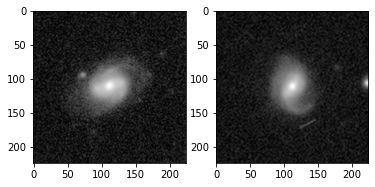

In [41]:
plt.figure()
plt.subplot(121)
plt.imshow(image1_t[0].numpy(), cmap='gray')

plt.subplot(122)
plt.imshow(image2_t[0].numpy(), cmap='gray')
plt.show()